**What is NLTK?**

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/suresh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**The purpose of this tutorial:**

To introduce NLTK and some of its most well-known functionalities while running through some basic webscraping exercises.


In [2]:
#step 1: get the raw html
import requests 
from bs4 import BeautifulSoup 
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://www.gutenberg.org/files/11/11-h/11-h.htm'
r = requests.get(url)
# Extract HTML 
html = r.text

print(html)

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")



<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <meta content="pg2html (binary v0.17)" name="linkgenerator" />
    <title>
      Alice's Adventures in Wonderland, by Lewis Carroll
    </title>
    <style type="text/css">
    <!--
    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size

**About the Gutenberg Project**

TLDR Johannes Gutenberg invented the first printing press which enabled mass distribution of written material. Project Gutenberg, which amasses legally free books for public use.

"Project Gutenberg offers over 58,000 free eBooks. Choose among free epub and Kindle eBooks, download them or read them online. You will find the world's great literature here, with focus on older works for which U.S. copyright has expired. Thousands of volunteers digitized and diligently proofread the eBooks, for enjoyment and education. "

Bonus points: Can someone guess the book we will use today? Written in London in 1865.

In [3]:
# tokenize the text--break it into smaller components
text = soup.get_text()
tokens = word_tokenize(text)
print(tokens)

['Alice', "'s", 'Adventures', 'in', 'Wonderland', ',', 'by', 'Lewis', 'Carroll', '<', '!', '--', 'body', '{', 'margin:5', '%', ';', 'background', ':', '#', 'faebd0', ';', 'text-align', ':', 'justify', '}', 'P', '{', 'text-indent', ':', '1em', ';', 'margin-top', ':', '.25em', ';', 'margin-bottom', ':', '.25em', ';', '}', 'H1', ',', 'H2', ',', 'H3', ',', 'H4', ',', 'H5', ',', 'H6', '{', 'text-align', ':', 'center', ';', 'margin-left', ':', '15', '%', ';', 'margin-right', ':', '15', '%', ';', '}', 'hr', '{', 'width', ':', '50', '%', ';', 'text-align', ':', 'center', ';', '}', '.foot', '{', 'margin-left', ':', '20', '%', ';', 'margin-right', ':', '20', '%', ';', 'text-align', ':', 'justify', ';', 'text-indent', ':', '-3em', ';', 'font-size', ':', '90', '%', ';', '}', 'blockquote', '{', 'font-size', ':', '97', '%', ';', 'font-style', ':', 'italic', ';', 'margin-left', ':', '10', '%', ';', 'margin-right', ':', '10', '%', ';', '}', '.mynote', '{', 'background-color', ':', '#', 'DDE', ';', 'co

Tokens are not just words, they include special characters, punctuation, and certain pieces of contractions. Obviously we need to clean this data more. This  process is sometimes called normalization. Two of the most common steps in normalization are unicameralization (getting rid of capitals) and getting rid of stopwords.

**What are stopwords?**

Some words are less interesting from a data analysis point of view. Filler words like pronouns and conjunctions for example aren't as valuable as nouns and words.

In [4]:
import nltk
nltk.download('stopwords')

words = []

# Loop through list and lower everything (unicameralization)

for word in tokens:
	words.append(word.lower())
	
# NLTK has a predefined list of stopwords for several languages including English
stop_words = nltk.corpus.stopwords.words('english')
#print(stop_words)

stop_words_french = nltk.corpus.stopwords.words('french')
print(stop_words_french)

# Initialize new list for important words
cleaned = []

for word in words:
	if word not in stop_words:
		cleaned.append(word)
print(cleaned)



['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront',

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suresh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Getting Warmer...**

No more stop words, but we are not quite there yet. There is other junk in the text, mainly punctuation and some HTML/Gutenberg jargon. How can we fix that? Using the string library. While we are at it, we can also remove numbers, which can be useful depending on the task, but are not super useful in our case.



In [5]:
import string

# removing punctuation and numbers
# feel free to use !(isnumeric) instead 

 

cleaner = []
for word in cleaned:
  if word not in string.punctuation and word.isalpha():
    cleaner.append(word)
    

print(string.punctuation)
print(cleaner)

    

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'body', 'background', 'justify', 'p', 'center', 'hr', 'width', 'center', 'justify', 'blockquote', 'italic', 'dde', 'color', 'padding', 'display', 'block', 'auto', 'center', 'justify', 'float', 'left', 'float', 'right', 'display', 'inline', 'normal', 'margin', 'padding', 'position', 'absolute', 'right', 'right', 'pre', 'italic', 'project', 'gutenberg', 'alice', 'adventures', 'wonderland', 'lewis', 'carroll', 'ebook', 'one', 'project', 'gutenberg', 'early', 'files', 'produced', 'time', 'proofing', 'methods', 'tools', 'well', 'developed', 'improved', 'illustrated', 'edition', 'title', 'may', 'viewed', 'ebook', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'title', 'alice', 'adventures', 'wonderland', 'author', 'lewis', 'carroll', 'release', 'date', 'june',

**What do we do when we have outliers?**

What should be done when dealing with characters that are clearly extraneous but not included in string.punctuation or nltk.stopwords?
We can easily add them in manually. This is a trick question because it is really data-dependent so make sure to be somewhat familiar with the source.

In [6]:
import string
# manually compiled lists based on data
punc = string.punctuation + str(['ï', '»', '¿','"'])


new_stop_words = ['body','margin','faebd0','text-align','justify','text-indent','margin-top',
             'margin-bottom','h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'text-align', 'p',
             'margin-left', 'margin-right','margin:5','.25em', 'project', 'gutenberg',
              'blockquote', 'italic', 'dde', 'inline', 'padding', 'pre', 'ebook', 'hr']

stop_words.extend(new_stop_words)


print(stop_words)
print(punc)


cleanest = []
for word in cleaner:
  if word not in stop_words and word not in punc and word.isalpha():
    cleanest.append(word)
print(cleanest)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Let's examine our clean data for patterns**

One of the most common patterns that is very useful is word frequency distribution. The most common words in a text can often give us a clue as to the most important aspects of it. Notice that Alice is very high on the list. This is a great start, but we need more context!

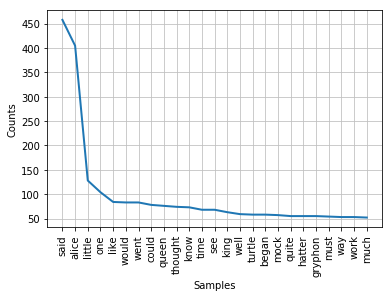

In [7]:
_
# plotting
freqdist1 = nltk.FreqDist(cleanest)
freqdist1.plot(25)

**More Impressive**

Use word cloud!

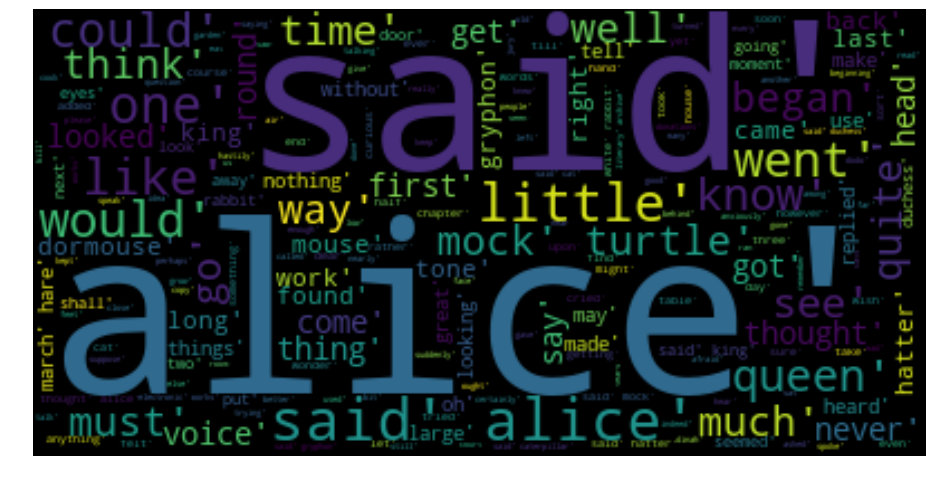

In [8]:
from wordcloud import WordCloud
text = str(cleanest)
wordcloud = WordCloud().generate(text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**NLTK and Text packages **

NLTK has some built-in texts for everyone to use. All texts can be manipulated using a set of NLTK commands. Observe:

In [9]:
import nltk
#nltk.download() # let's see all of NLTK through the UI
nltk.download('book')

# for this example we will be using the nltk book collection 
# this is every example corpus used in the NLTK Book (O'Riley)
from nltk.book import *






[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/suresh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/suresh/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/suresh/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/suresh/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/suresh/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/suresh/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package depend

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**Trying some fun commands**

Let's see what kinds of commands NLTK has in store.

In [10]:
print(text6)
print(text1)

# the concordance command shows you every single instance of a word, *in context*
#text6.concordance("grail")
#text6.concordance("scratch")

# the similar command finds words in a text that are similar to a given word
#print(text1.similar("monstrous"))
#print(text6.similar("grail"))

# the common contexts command shows us where two words have occured near each other
#print(text2.common_contexts(["very", "monstrous"]))



<Text: Monty Python and the Holy Grail>
<Text: Moby Dick by Herman Melville 1851>


**Back to Wonderland**

Let's try some of these new commands on our own scraped data and see if we can gain any insight. We will have to make our own text file from the scraped and cleaned data. 

In [11]:

# now we can make our own text
my_text = nltk.Text(cleanest)
my_text.concordance('gryphon') # based on the results of our graph

# It appears that the Gryphon is actually a character!

my_text.similar("gryphon")

my_text.common_contexts(["hatter", "gryphon"])







Displaying 25 of 55 matches:
utions queen ordered soon came upon gryphon lying fast asleep sun know gryphon 
 gryphon lying fast asleep sun know gryphon look picture lazy thing said queen 
 ordered walked leaving alice alone gryphon alice quite like look creature whol
te safe stay go savage queen waited gryphon sat rubbed eyes watched queen till 
 queen till sight chuckled fun said gryphon half half alice fun said alice said
half half alice fun said alice said gryphon fancy never executes nobody know co
ld break pitied deeply sorrow asked gryphon gryphon answered nearly words fancy
 pitied deeply sorrow asked gryphon gryphon answered nearly words fancy got sor
 tears said nothing young lady said gryphon wants know history tell said mock t
oken occasional exclamation hjckrrh gryphon constant heavy sobbing mock turtle 
shamed asking simple question added gryphon sat silent looked poor alice felt r
or alice felt ready sink earth last gryphon said mock turtle drive old fellow d
 said mock 

**More Concrete Visualization**

We previously saw how often a particular word occured, displayed some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. In a novel, this helps us follow the plot.

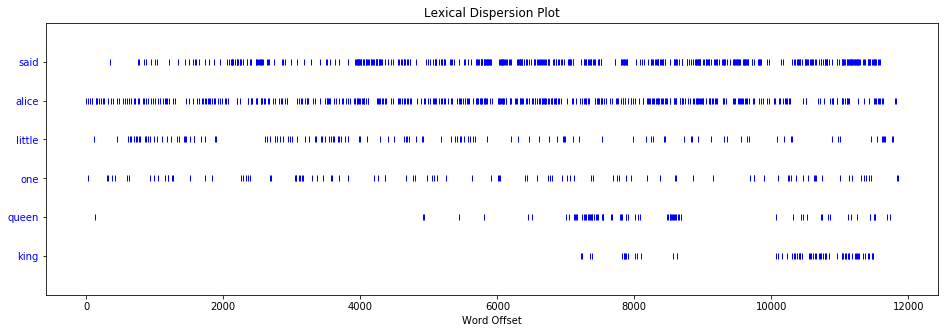

In [12]:
import numpy
import matplotlib
plt.figure(figsize=(16,5))
words = ['said', 'alice', 'little', 'one', 'queen', 'king']
my_text.dispersion_plot(words)

**More Words, More Fun: Bigrams and Collocations**

Words are fun, but bigrams and collocations give you even more information. Bigrams are just word tuples, but collocations are word tuples that frequently only appear together. 

In [13]:
 
bigrm = nltk.bigrams(my_text)
list(bigrm)


[('alice', 'adventures'),
 ('adventures', 'wonderland'),
 ('wonderland', 'lewis'),
 ('lewis', 'carroll'),
 ('carroll', 'background'),
 ('background', 'center'),
 ('center', 'width'),
 ('width', 'center'),
 ('center', 'color'),
 ('color', 'display'),
 ('display', 'block'),
 ('block', 'auto'),
 ('auto', 'center'),
 ('center', 'float'),
 ('float', 'left'),
 ('left', 'float'),
 ('float', 'right'),
 ('right', 'display'),
 ('display', 'normal'),
 ('normal', 'position'),
 ('position', 'absolute'),
 ('absolute', 'right'),
 ('right', 'right'),
 ('right', 'alice'),
 ('alice', 'adventures'),
 ('adventures', 'wonderland'),
 ('wonderland', 'lewis'),
 ('lewis', 'carroll'),
 ('carroll', 'one'),
 ('one', 'early'),
 ('early', 'files'),
 ('files', 'produced'),
 ('produced', 'time'),
 ('time', 'proofing'),
 ('proofing', 'methods'),
 ('methods', 'tools'),
 ('tools', 'well'),
 ('well', 'developed'),
 ('developed', 'improved'),
 ('improved', 'illustrated'),
 ('illustrated', 'edition'),
 ('edition', 'title')

In [14]:
my_text.collocations()


mock turtle; march hare; said alice; white rabbit; literary archive;
electronic works; archive foundation; united states; join dance;
public domain; minute two; said king; beautiful soup; set forth;
adventures wonderland; beg pardon; terms agreement; thought alice;
lewis carroll; full license


[beautiful soup](https://www.google.com/search?q=beautiful+soup+poem&client=firefox-b-1-d&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjWsO7cworiAhX4IDQIHU7xDLEQ_AUIDygC&biw=1080&bih=635#imgrc=-6-_sKjd3Z4wXM:)

We can always build a model based on the bigrams and collocations and try to graph that, this is exactly what freq-dist does for single words. But since this tuitorial is short, I wanted to use a pre-built tool.
[Google n-gram viewer](https://books.google.com/ngrams/graph?content=beautiful+soup&year_start=1850&year_end=2000&corpus=15&smoothing=0&share=&direct_url=t1%3B%2Cbeautiful%20soup%3B%2Cc0#t1%3B%2Cbeautiful%20soup%3B%2Cc0) with Google n-gram viewer you can view the frequency of n-grams (not just words or bigrams) over thousands of books over time.